<a href="https://colab.research.google.com/github/pauladel/DS3001-Project/blob/main/ds3001_final_project_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/pauladel/DS3001-Project/

Cloning into 'DS3001-Project'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 31 (delta 6), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (31/31), 6.22 MiB | 5.54 MiB/s, done.
Resolving deltas: 100% (6/6), done.


ideas --

I would focus on thinking of a specific “client” for your model, like FEMA. What is the specific prediction problem? What is the y? Why is that y important? What information is available at the time decisions have to be made? What’s the context in which FEMA would use your tool? You don’t need to adopt FEMA as your hypothetical client, but thinking through how the tool would be used will answer lots of your questions and make choices much easier to make.

<h3>Datasets<h3>

gdp_by_state_1997_2020.csv: This file contains data on the gross domestic product (GDP) by state, spanning from 1997 to 2020. This could help assess the economic resilience and wealth of states before and after disasters.

health_socio_avg_household_size.csv: This file contains data about the average household size, which can indicate social structure and density, affecting disaster recovery.

health_socio_cancer_reg.csv: This provides cancer incidence or registration data, offering insights into long-term health impacts in certain regions.

unemployment_per_state.csv: This dataset provides unemployment rates per state, potentially highlighting economic vulnerability related to poverty.

us_disaster_declarations.csv: This includes data about declared natural disasters in the U.S., indicating which areas have been affected by disasters over time.

In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# read in all raw data
gdp_state = pd.read_csv('https://raw.githubusercontent.com/pauladel/DS3001-Project/refs/heads/main/raw-data/gdp_by_state_1997_2020.csv')
household = pd.read_csv('https://raw.githubusercontent.com/pauladel/DS3001-Project/refs/heads/main/raw-data/health_socio_avg_household_size.csv')
cancer = pd.read_csv('https://raw.githubusercontent.com/pauladel/DS3001-Project/refs/heads/main/raw-data/health_socio_avg_household_size.csv')
unemployment = pd.read_csv('https://raw.githubusercontent.com/pauladel/DS3001-Project/refs/heads/main/raw-data/unemployment_per_state.csv')
disaster_decs = pd.read_csv('https://raw.githubusercontent.com/pauladel/DS3001-Project/refs/heads/main/raw-data/us_disaster_declarations.csv')

In [4]:
#display raw data
gdp_state.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"""00000""",United States *,,SAGDP2N,1.0,...,All industry total,Millions of current dollars,8577552.0,9062817.0,...,15542582.0,16197007.0,16784851.0,17527258.0,18238301.0,18745075.0,19542980.0,20611861.0,21433226.0,20936558.0
1,"""00000""",United States *,,SAGDP2N,2.0,...,Private industries,Millions of current dollars,7431992.0,7871500.0,...,13405520.0,14037519.0,14572341.0,15255889.0,15898859.0,16360179.0,17094245.0,18062184.0,18793750.0,18290860.0
2,"""00000""",United States *,,SAGDP2N,3.0,11,"Agriculture, forestry, fishing and hunting",Millions of current dollars,108637.0,99756.0,...,180945.0,179573.0,215601.0,201003.0,182283.0,166571.0,176625.0,178569.0,175373.0,175802.0
3,"""00000""",United States *,,SAGDP2N,4.0,111-112,Farms,Millions of current dollars,88136.0,79030.0,...,152249.0,148939.0,184621.0,168147.0,147384.0,130639.0,140053.0,140271.0,136080.0,(NA)
4,"""00000""",United States *,,SAGDP2N,5.0,113-115,"Forestry, fishing, and related activities",Millions of current dollars,20501.0,20726.0,...,28696.0,30634.0,30980.0,32856.0,34899.0,35932.0,36571.0,38298.0,39293.0,(NA)


In [5]:
#display raw data
household.head()

,index,statefips,countyfips,avghouseholdsize,geography
0,0,2,13,2.43,"Aleutians East Borough, Alaska"
1,1,2,16,3.59,"Aleutians West Census Area, Alaska"
2,2,2,20,2.77,"Anchorage Municipality, Alaska"
3,3,2,50,3.86,"Bethel Census Area, Alaska"
4,4,2,60,2.50,"Bristol Bay Borough, Alaska"


In [6]:
#display raw data
cancer.head()

,index,statefips,countyfips,avghouseholdsize,geography
0,0,2,13,2.43,"Aleutians East Borough, Alaska"
1,1,2,16,3.59,"Aleutians West Census Area, Alaska"
2,2,2,20,2.77,"Anchorage Municipality, Alaska"
3,3,2,50,3.86,"Bethel Census Area, Alaska"
4,4,2,60,2.50,"Bristol Bay Borough, Alaska"


In [7]:
#display raw data
unemployment.head()

,FIPS Code,State/Area,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
0,1,Alabama,1976,1,"2,605,000","1,484,555",57.0,"1,386,023",53.2,"98,532",6.6
1,2,Alaska,1976,1,"232,000","160,183",69.0,"148,820",64.1,"11,363",7.1
2,4,Arizona,1976,1,"1,621,000","964,120",59.5,"865,871",53.4,"98,249",10.2
3,5,Arkansas,1976,1,"1,536,000","889,044",57.9,"824,395",53.7,"64,649",7.3
4,6,California,1976,1,"15,621,000","9,774,280",62.6,"8,875,685",56.8,"898,595",9.2


In [8]:
#display raw data
disaster_decs.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,NaN,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,NaN,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,NaN,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,NaN,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,NaN,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61


In [9]:
# General cleaning function
def clean_dataset(df):
    df = df.drop_duplicates()
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
    df.replace(['(NA)', 'NA', '', ' '], np.nan, inplace=True)

    return df

# GDP by State Cleaning
def clean_gdp(df):
    df = clean_dataset(df)
    if 'geoname' in df.columns:
        df = df[~df['geoname'].str.contains("United States", na=False)]
    year_cols = [col for col in df.columns if col.isdigit()]
    for col in year_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    return df

# Household Data Cleaning
def clean_household(df):
    df = clean_dataset(df)
    if 'geography' in df.columns:
        geography_split = df['geography'].str.split(', ', expand=True)
        if geography_split.shape[1] == 2:
            df[['county', 'state']] = geography_split
        else:
            print("Geography split failed. Check data format.")
        df.drop(columns=['geography'], inplace=True)

    return df

# Cancer Registry Cleaning
def clean_cancer(df):
    df = clean_dataset(df)
    for col in df.filter(like='pct').columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].apply(lambda x: x if 0 <= x <= 100 else np.nan)

    return df

# Unemployment Data Cleaning
def clean_unemployment(df):
    df = clean_dataset(df)
    numeric_cols = ['total_civilian_non_institutional_population_in_state/area',
                    'total_civilian_labor_force_in_state/area',
                    'total_employment_in_state/area',
                    'total_unemployment_in_state/area']

    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

    return df

# Disaster Declarations Cleaning
def clean_disaster_decs(df):
    df = clean_dataset(df)
    date_cols = ['declaration_date', 'incident_begin_date', 'incident_end_date', 'disaster_closeout_date']
    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')

    return df

gdp_state_cleaned = clean_gdp(gdp_state)
household_cleaned = clean_household(household)
cancer_cleaned = clean_cancer(cancer)
unemployment_cleaned = clean_unemployment(unemployment)
disaster_decs_cleaned = clean_disaster_decs(disaster_decs)

In [10]:
print("GDP by State (Cleaned):")
print(gdp_state_cleaned.head() , '\n')

print("\nHousehold Data (Cleaned):")
print(household_cleaned.head() , '\n' )

print("\nCancer Registry Data (Cleaned):")
print(cancer_cleaned.head(),  '\n')

print("\nUnemployment Data (Cleaned):")
print(unemployment_cleaned.head(),  '\n')

print("\nDisaster Declarations Data (Cleaned):")
print(disaster_decs_cleaned.head(), '\n')

GDP by State (Cleaned):
      geofips  geoname region tablename  linecode industryclassification  \
96    "01000"  Alabama      5   SAGDP2N       1.0                    ...   
97    "01000"  Alabama      5   SAGDP2N       2.0                    ...   
98    "01000"  Alabama      5   SAGDP2N       3.0                     11   
99    "01000"  Alabama      5   SAGDP2N       4.0                111-112   
100   "01000"  Alabama      5   SAGDP2N       5.0                113-115   

                                      description  \
96                             All industry total   
97                             Private industries   
98     Agriculture, forestry, fishing and hunting   
99                                          Farms   
100     Forestry, fishing, and related activities   

                            unit      1997      1998  ...      2011      2012  \
96   Millions of current dollars  104716.9  110181.3  ...  181929.9  186553.9   
97   Millions of current dollars   874

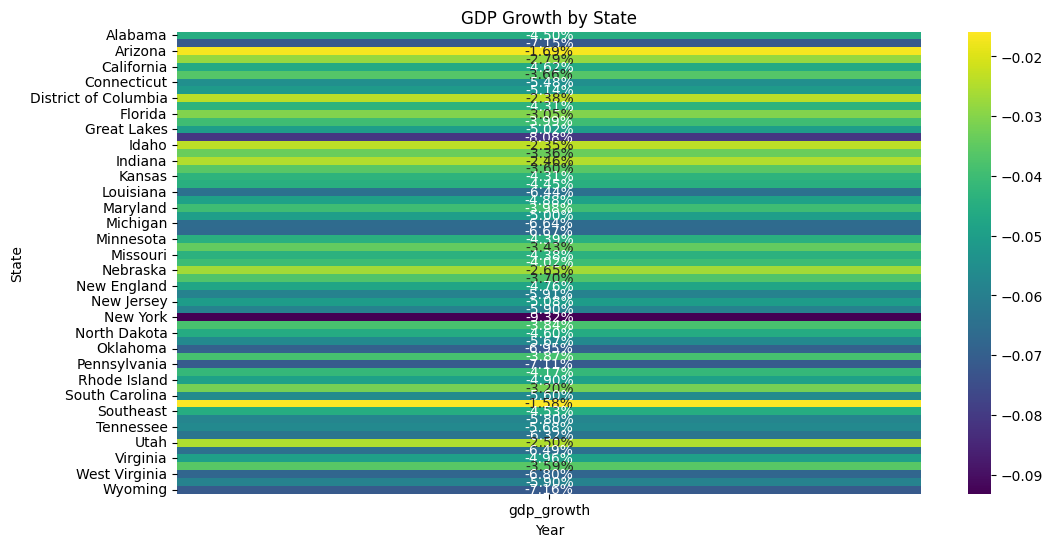

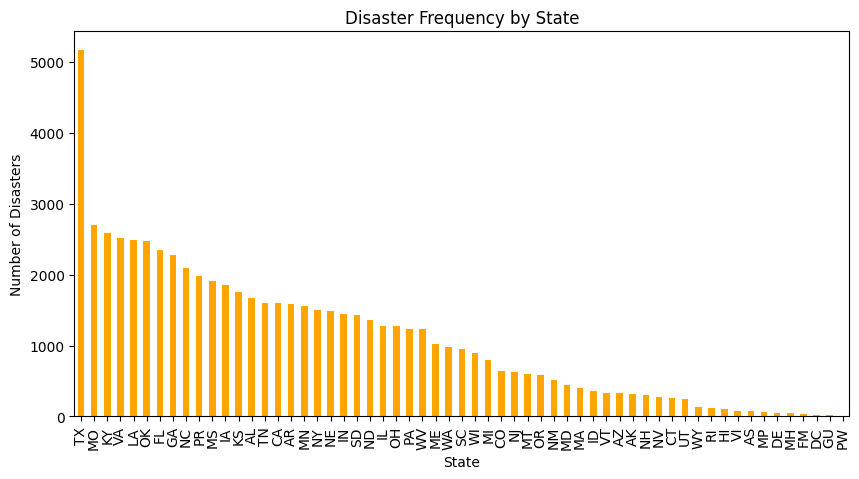

<Axes: xlabel='unemployment_rate', ylabel='Count'>

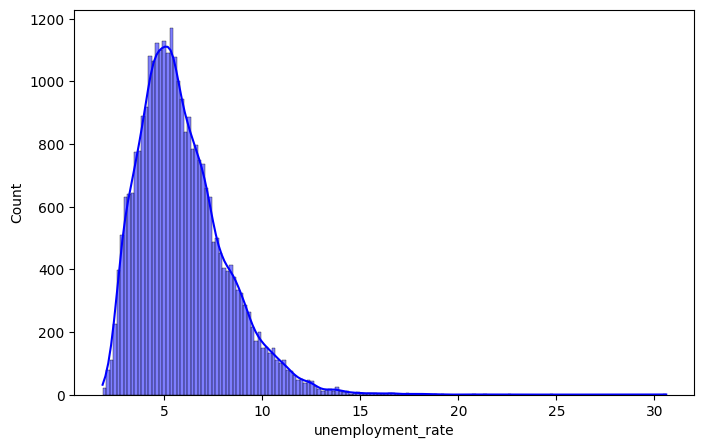

In [11]:
# Calculate Unemployment Rate from Unemployment Data
unemployment_cleaned['unemployment_rate'] = (
    unemployment_cleaned['total_unemployment_in_state/area'] /
    unemployment_cleaned['total_civilian_labor_force_in_state/area']
) * 100

# Normalize GDP by Year (for visual trends)
gdp_state_cleaned['gdp_growth'] = gdp_state_cleaned.iloc[:, -1] / gdp_state_cleaned.iloc[:, -2] - 1  # Comparing last two years

# Example Health Risk Index from Cancer and Household Data
if 'avg_household_size' in household_cleaned.columns:
    household_cleaned['health_risk_index'] = (
        household_cleaned['avg_household_size'] +
        cancer_cleaned['pct_population_cancer']
    ) / 2

# Disaster Frequency by State
disaster_frequency = disaster_decs_cleaned['state'].value_counts()

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# GDP Growth Heatmap
plt.figure(figsize=(12, 6))
gdp_growth_data = gdp_state_cleaned.pivot_table(
    index='geoname', values='gdp_growth'
)
sns.heatmap(gdp_growth_data, annot=True, cmap='viridis', fmt=".2%")
plt.title("GDP Growth by State")
plt.xlabel("Year")
plt.ylabel("State")
plt.show()

# Bar Plot: Disaster Frequency
plt.figure(figsize=(10, 5))
disaster_frequency.plot(kind='bar', color='orange')
plt.title("Disaster Frequency by State")
plt.xlabel("State")
plt.ylabel("Number of Disasters")
plt.show()

# Unemployment Rate Distribution
plt.figure(figsize=(8, 5))
sns.histplot(unemployment_cleaned['unemployment_rate'], kde=True, color='blue')


In [12]:
unemployment_cleaned.head()

,fips_code,state/area,year,month,total_civilian_non_institutional_population_in_state/area,total_civilian_labor_force_in_state/area,percent_(%)_of_state/area's_population,total_employment_in_state/area,percent_(%)_of_labor_force_employed_in_state/area,total_unemployment_in_state/area,percent_(%)_of_labor_force_unemployed_in_state/area,unemployment_rate
0,1,Alabama,1976,1,2605000,1484555,57.0,1386023,53.2,98532,6.6,6.637140
1,2,Alaska,1976,1,232000,160183,69.0,148820,64.1,11363,7.1,7.093762
2,4,Arizona,1976,1,1621000,964120,59.5,865871,53.4,98249,10.2,10.190536
3,5,Arkansas,1976,1,1536000,889044,57.9,824395,53.7,64649,7.3,7.271744
4,6,California,1976,1,15621000,9774280,62.6,8875685,56.8,898595,9.2,9.193465


In [13]:
disaster_decs_cleaned

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id
0,DR-1-GA,1,GA,DR,1953-05-02 00:00:00+00:00,1953,Tornado,Tornado,0,1,...,1953-05-02 00:00:00+00:00,1954-06-01 00:00:00+00:00,13000,0,Statewide,53013,NaN,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a
1,DR-2-TX,2,TX,DR,1953-05-15 00:00:00+00:00,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15 00:00:00+00:00,1958-01-01 00:00:00+00:00,48000,0,Statewide,53003,NaN,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6
2,DR-3-LA,3,LA,DR,1953-05-29 00:00:00+00:00,1953,Flood,Flood,0,1,...,1953-05-29 00:00:00+00:00,1960-02-01 00:00:00+00:00,22000,0,Statewide,53005,NaN,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0
3,DR-4-MI,4,MI,DR,1953-06-02 00:00:00+00:00,1953,Tornado,Tornado,0,1,...,1953-06-02 00:00:00+00:00,1956-02-01 00:00:00+00:00,26000,0,Statewide,53004,NaN,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6
4,DR-5-MT,5,MT,DR,1953-06-06 00:00:00+00:00,1953,Flood,Floods,0,1,...,1953-06-06 00:00:00+00:00,1955-12-01 00:00:00+00:00,30000,0,Statewide,53006,NaN,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64087,DR-4696-ME,4696,ME,DR,2023-03-22 00:00:00+00:00,2023,Severe Storm,Severe Storm And Flooding,0,0,...,2022-12-24 00:00:00+00:00,NaT,23031,99031,"York (County)(in MSA 6400,6450)",23013,NaN,2023-03-23T22:31:41Z,c6ed4ead7fd3bee8113ef15d9110e845c56a8b2f,3bd84f66-74d0-4e4a-9287-2414fda89014
64088,DR-4697-MS,4697,MS,DR,2023-03-26 00:00:00+00:00,2023,Severe Storm,"Severe Storms, Straight-Line Winds, And Tornadoes",1,0,...,2023-03-25 00:00:00+00:00,NaT,28015,99015,Carroll (County),23025,2023-05-25T00:00:00Z,2023-03-26T06:41:23Z,9ccd8b25b2e64d4e44a043b1da61f3c42e2d02a9,764fa617-efd9-44c4-9d4a-c48e972b485c
64089,DR-4697-MS,4697,MS,DR,2023-03-26 00:00:00+00:00,2023,Severe Storm,"Severe Storms, Straight-Line Winds, And Tornadoes",1,0,...,2023-03-25 00:00:00+00:00,NaT,28053,99053,Humphreys (County),23025,2023-05-25T00:00:00Z,2023-03-26T06:41:23Z,62d6f324279680dbb6b1eb2ce91a9bf5ae964e24,c9300696-062b-430f-9f9d-3ad6b1562779
64090,DR-4697-MS,4697,MS,DR,2023-03-26 00:00:00+00:00,2023,Severe Storm,"Severe Storms, Straight-Line Winds, And Tornadoes",1,0,...,2023-03-25 00:00:00+00:00,NaT,28095,99095,Monroe (County),23025,2023-05-25T00:00:00Z,2023-03-26T06:41:23Z,5cb6b2789fc77375f0a1d0e1a8898a1ce3dfc952,df697ed2-4c59-4d02-84e7-d4e84d6e2723


In [14]:
state_mapping = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming'
}

disaster_decs_cleaned['state'] = disaster_decs_cleaned['state'].astype(str)
print(disaster_decs_cleaned['state'].unique())


['GA' 'TX' 'LA' 'MI' 'MT' 'IA' 'MA' 'NH' 'FL' 'AK' 'MS' 'CA' 'NV' 'SD'
 'WV' 'RI' 'ME' 'CT' 'NY' 'NM' 'SC' 'NC' 'IN' 'HI' 'CO' 'KS' 'OK' 'NJ'
 'PA' 'OR' 'WA' 'ID' 'OH' 'PR' 'KY' 'VA' 'MO' 'AR' 'MN' 'ND' 'IL' 'NE'
 'AL' 'MD' 'DE' 'GU' 'TN' 'FM' 'WY' 'VT' 'VI' 'WI' 'AS' 'AZ' 'MP' 'UT'
 'MH' 'DC' 'PW']


In [15]:
#Changing column name to 'state'
unemployment_cleaned.rename(columns={'state/area': 'state'}, inplace=True)
unemployment_cleaned.head()

,fips_code,state,year,month,total_civilian_non_institutional_population_in_state/area,total_civilian_labor_force_in_state/area,percent_(%)_of_state/area's_population,total_employment_in_state/area,percent_(%)_of_labor_force_employed_in_state/area,total_unemployment_in_state/area,percent_(%)_of_labor_force_unemployed_in_state/area,unemployment_rate
0,1,Alabama,1976,1,2605000,1484555,57.0,1386023,53.2,98532,6.6,6.637140
1,2,Alaska,1976,1,232000,160183,69.0,148820,64.1,11363,7.1,7.093762
2,4,Arizona,1976,1,1621000,964120,59.5,865871,53.4,98249,10.2,10.190536
3,5,Arkansas,1976,1,1536000,889044,57.9,824395,53.7,64649,7.3,7.271744
4,6,California,1976,1,15621000,9774280,62.6,8875685,56.8,898595,9.2,9.193465


In [16]:
# Map the state abbreviations to full names using the state_mapping dictionary
disaster_decs_cleaned['state'] = disaster_decs_cleaned['state'].map(state_mapping)

disaster_decs_cleaned.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id
0,DR-1-GA,1,Georgia,DR,1953-05-02 00:00:00+00:00,1953,Tornado,Tornado,0,1,...,1953-05-02 00:00:00+00:00,1954-06-01 00:00:00+00:00,13000,0,Statewide,53013,NaN,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a
1,DR-2-TX,2,Texas,DR,1953-05-15 00:00:00+00:00,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15 00:00:00+00:00,1958-01-01 00:00:00+00:00,48000,0,Statewide,53003,NaN,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6
2,DR-3-LA,3,Louisiana,DR,1953-05-29 00:00:00+00:00,1953,Flood,Flood,0,1,...,1953-05-29 00:00:00+00:00,1960-02-01 00:00:00+00:00,22000,0,Statewide,53005,NaN,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0
3,DR-4-MI,4,Michigan,DR,1953-06-02 00:00:00+00:00,1953,Tornado,Tornado,0,1,...,1953-06-02 00:00:00+00:00,1956-02-01 00:00:00+00:00,26000,0,Statewide,53004,NaN,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6
4,DR-5-MT,5,Montana,DR,1953-06-06 00:00:00+00:00,1953,Flood,Floods,0,1,...,1953-06-06 00:00:00+00:00,1955-12-01 00:00:00+00:00,30000,0,Statewide,53006,NaN,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61


THIS BELOW

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate disaster frequency by state
disaster_frequency = disaster_decs_cleaned['state'].value_counts().reset_index()
disaster_frequency.columns = ['state', 'disaster_count']

disaster_frequency.head()

,state,disaster_count
0,Texas,5173
1,Missouri,2704
2,Kentucky,2583
3,Virginia,2524
4,Louisiana,2493


In [18]:
# Prepare unemployment data (average unemployment rate by state)
unemployment_avg = unemployment_cleaned.groupby('state')['unemployment_rate'].mean().reset_index()


# Merge disaster frequency with unemployment data
comparison_data = pd.merge(disaster_frequency, unemployment_avg, on='state', how='inner')

comparison_data.head()

,state,disaster_count,unemployment_rate
0,Texas,5173,5.971116
1,Missouri,2704,5.771239
2,Kentucky,2583,6.536713
3,Virginia,2524,4.666706
4,Louisiana,2493,7.009207


In [19]:
reversed_state_mapping = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Mapping methods we did prior but reversing to abbreviations
comparison_data['state'] = comparison_data['state'].map(reversed_state_mapping)

comparison_data.head()

,state,disaster_count,unemployment_rate
0,TX,5173,5.971116
1,MO,2704,5.771239
2,KY,2583,6.536713
3,VA,2524,4.666706
4,LA,2493,7.009207


<Figure size 1500x800 with 0 Axes>

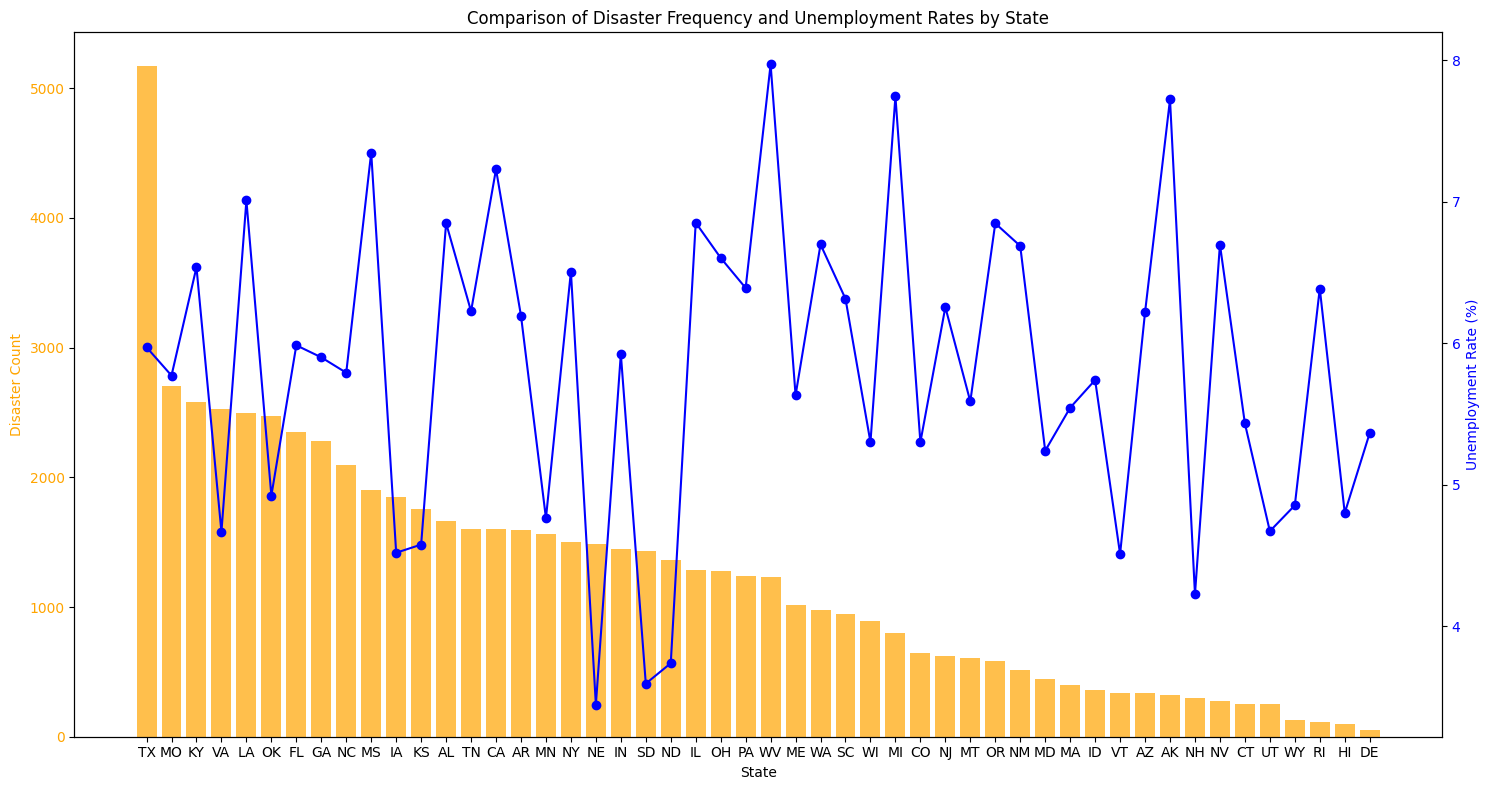

<ipython-input-20-20fc63972f13>:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


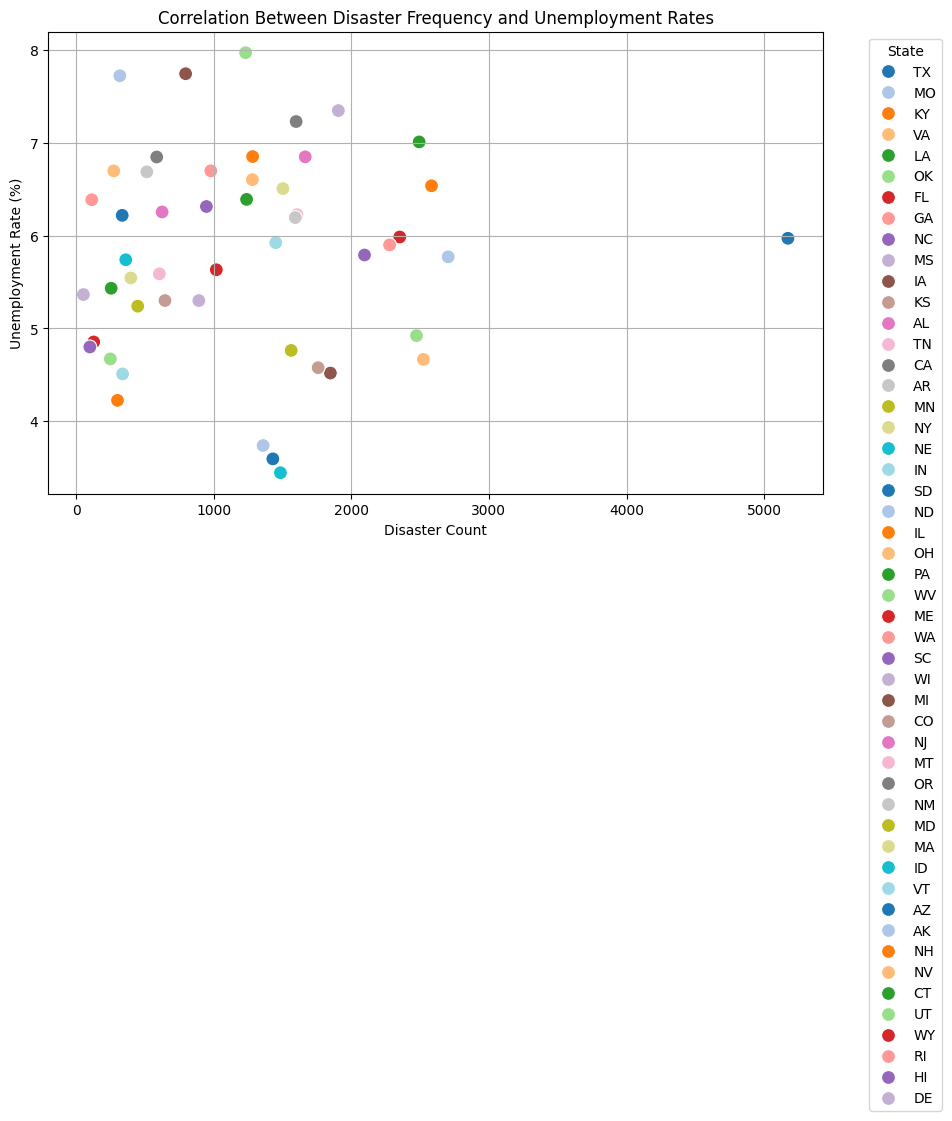

In [20]:


# Visualization 1: Side-by-Side Bar Chart
plt.figure(figsize=(15, 8))
comparison_data = comparison_data.sort_values('disaster_count', ascending=False)

# Create twin axes for dual bar chart
fig, ax1 = plt.subplots(figsize=(15, 8))

# Bar for Disaster Frequency
ax1.bar(comparison_data['state'], comparison_data['disaster_count'], color='orange', label='Disaster Count', alpha=0.7)
ax1.set_ylabel('Disaster Count', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.set_xlabel('State')

# Add second y-axis for unemployment rate
ax2 = ax1.twinx()
ax2.plot(comparison_data['state'], comparison_data['unemployment_rate'], color='blue', label='Unemployment Rate (%)', marker='o')
ax2.set_ylabel('Unemployment Rate (%)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Titles and legend
plt.title("Comparison of Disaster Frequency and Unemployment Rates by State")
fig.tight_layout()
plt.show()

# Visualization 2: Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=comparison_data['disaster_count'],
    y=comparison_data['unemployment_rate'],
    hue=comparison_data['state'], palette='tab20', s=100
)


plt.title("Correlation Between Disaster Frequency and Unemployment Rates")
plt.xlabel("Disaster Count")
plt.ylabel("Unemployment Rate (%)")
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-53-d30faf850b26>:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


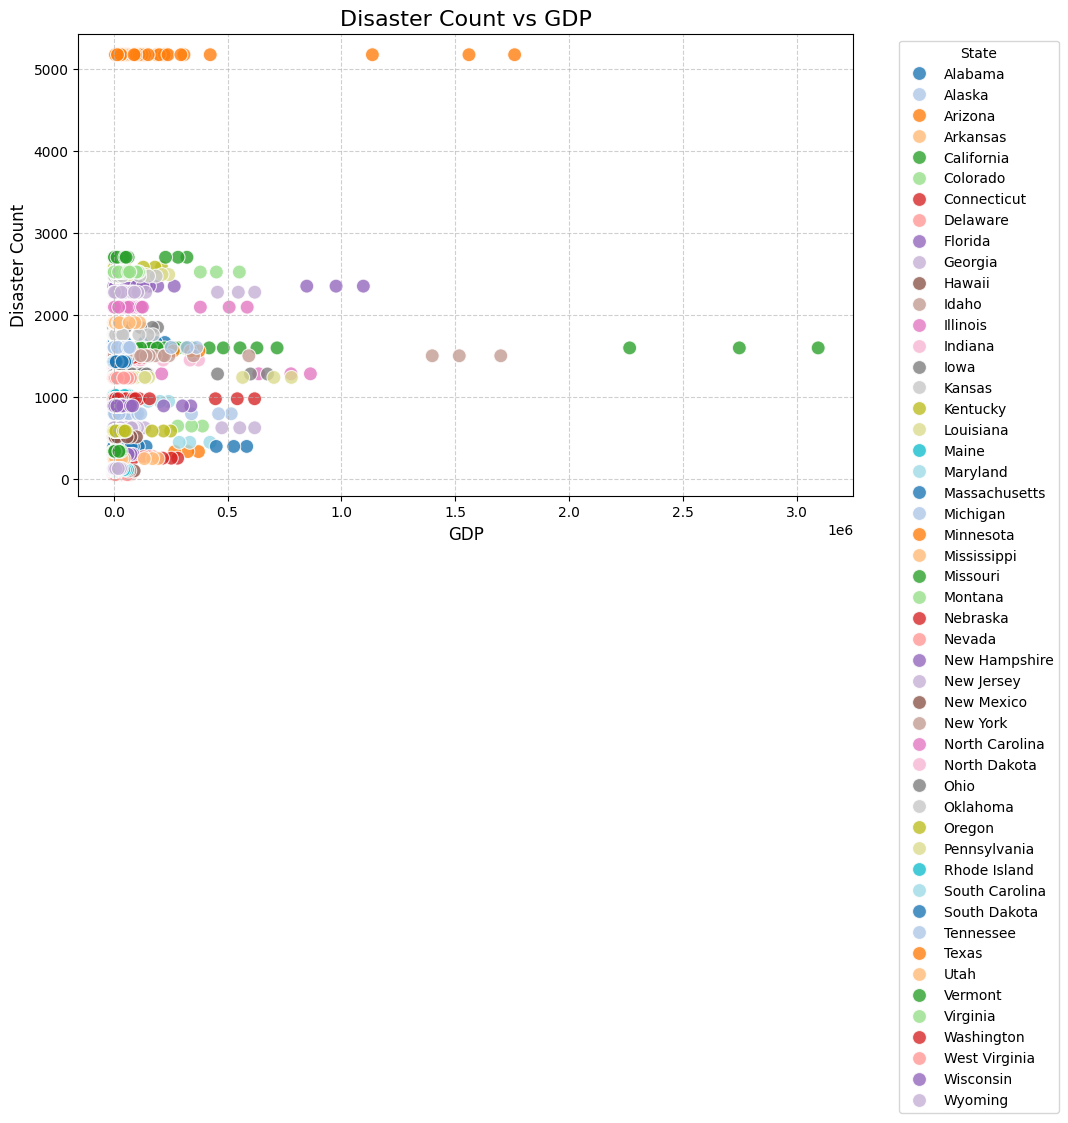

In [53]:
from sklearn.preprocessing import MinMaxScaler

# Merge GDP and disaster data
disaster_counts = disaster_decs_cleaned.groupby('state').size().reset_index(name='disaster_count')
gdp_latest = gdp_state_cleaned[['geoname', '2020']].rename(columns={'geoname': 'state', '2020': 'gdp'})
gdp_disaster_data = pd.merge(gdp_latest, disaster_counts, how='inner', left_on='state', right_on='state')
scaler = MinMaxScaler(feature_range=(0, 5000))
gdp_disaster_data['scaled_disaster_count'] = scaler.fit_transform(gdp_disaster_data[['disaster_count']])
aggregated_data = gdp_disaster_data.groupby('state', as_index=False).agg({
    'disaster_count': 'sum',
    'gdp': 'mean'
})

# Visualization 3: Scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=gdp_disaster_data,
    y='disaster_count',
    x='gdp',
    hue='state',
    palette='tab20',
    s=100,
    alpha=0.8
)

plt.title('Disaster Count vs GDP', fontsize=16)
plt.ylabel('Disaster Count', fontsize=12)
plt.xlabel('GDP', fontsize=12)
plt.legend(
    title="State",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=10
)

plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()